# Merged model evaluation

In [4]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats



In [44]:
# fname = f'/Models/Evaluation/eval_dataset7_sym.tsv'
fname_mergedC2 = f'/Models/Evaluation/nettekoven_68/eval_sym_MdPoNiIbWmDeSo_space-MNISymC2_K-32_meth-mixed.tsv'
fname_mergedC3 = f'/Models/Evaluation/nettekoven_68/eval_on-task_sym_MdPoNiIbWmDeSo_space-MNISymC3_K-32_meth-mixed.tsv'
fname_orig = f'/Models/Evaluation/eval_dataset7_sym.tsv'
D_orig = pd.read_csv(ut.model_dir + fname_orig, delimiter='\t')
D_orig['source'] = 'dataset7'

D_merged = pd.concat([pd.read_csv(ut.model_dir + fname_mergedC2, delimiter='\t'), pd.read_csv(ut.model_dir + fname_mergedC3, delimiter='\t')], ignore_index=True)
D_merged['source'] = 'merged'

D = pd.concat([D_orig, D_merged], ignore_index=True).reset_index(drop=True)


crits = ['dcbc_group','dcbc_indiv','coserr_group',
        'coserr_floor','coserr_ind2','coserr_ind3']

# Leave-one-out indicator
loo = [ True if len(train.split(" ")) == 6 else False for t,train in enumerate(D.train_data) ]
individual = [ True if len(train.split(" ")) == 1 else False for t,train in enumerate(D.train_data) ]
all = [ True if len(train.split(" ")) == 7 else False for t,train in enumerate(D.train_data) ]

D['train_type_detailed'] = D['train_data']
D['train_type_detailed'][loo] = 'loo'
D['train_type_detailed'][all] = 'all'
D['train_type'] = D['train_type_detailed']
D['train_type'][individual] = 'individual'
D['symmetric'] = True

D.tail()

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_24326/953765247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['train_type_detailed'][loo] = 'loo'
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_24326/953765247.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['train_type_detailed'][all] = 'all'
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_24326/953765247.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,common_kappa,...,session,coserr_group,coserr_floor,coserr_ind2,coserr_ind3,source,test_sess,train_type_detailed,train_type,symmetric
18399,sym_MdPoNiIbWmDeSo,MNISymC3,32,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,19402024.0,Somatotopic,half,2,3,True,...,NaN,NaN,NaN,NaN,NaN,merged,all,all,all,True
18400,sym_MdPoNiIbWmDeSo,MNISymC3,32,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,19402024.0,Somatotopic,half,2,4,True,...,NaN,NaN,NaN,NaN,NaN,merged,all,all,all,True
18401,sym_MdPoNiIbWmDeSo,MNISymC3,32,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,19402024.0,Somatotopic,half,2,5,True,...,NaN,NaN,NaN,NaN,NaN,merged,all,all,all,True
18402,sym_MdPoNiIbWmDeSo,MNISymC3,32,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,19402024.0,Somatotopic,half,2,6,True,...,NaN,NaN,NaN,NaN,NaN,merged,all,all,all,True
18403,sym_MdPoNiIbWmDeSo,MNISymC3,32,['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'De...,19402024.0,Somatotopic,half,2,7,True,...,NaN,NaN,NaN,NaN,NaN,merged,all,all,all,True


### Comparing merged K 32 and data-derived K 34

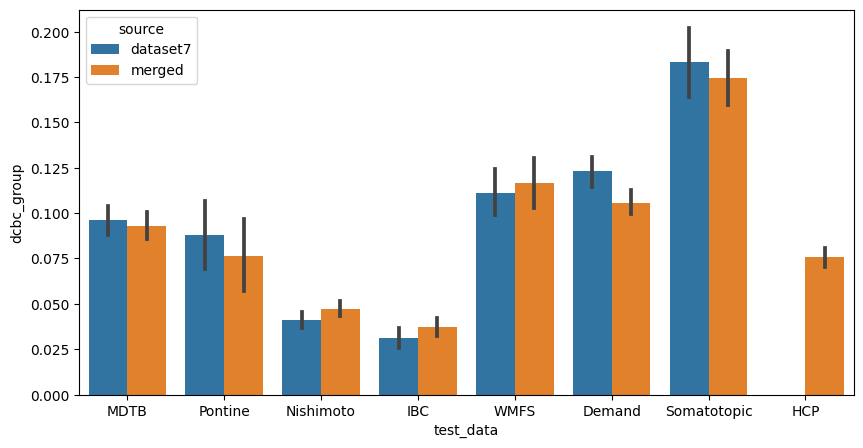

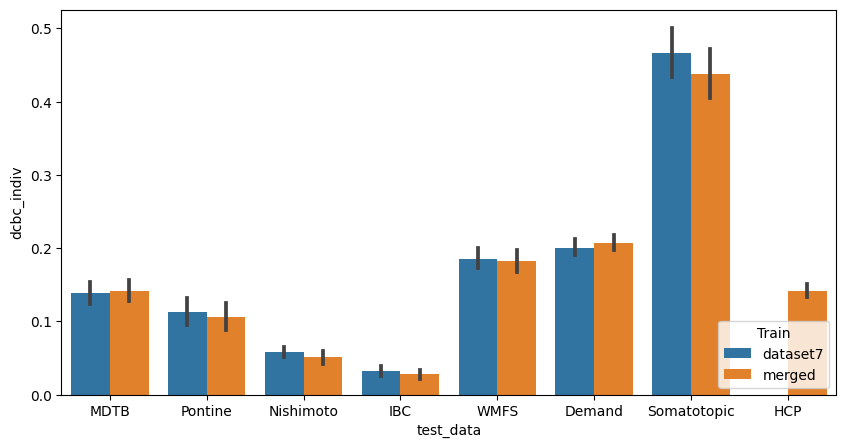

In [45]:
figsize = (10, 5)
plt.figure(figsize=figsize)
sb.barplot(data=D[(D.train_type == 'all') & ((D.K == 32) | (D.K == 34))], x="test_data",
           y="dcbc_group", hue="source")

plt.figure(figsize=figsize)
sb.barplot(data=D[(D.train_type == 'all') & ((D.K == 32) | (D.K == 34))], x="test_data",
           y="dcbc_indiv", hue="source")
plt.legend(loc='lower right', title='Train')


### Comparing merged K 32 and data-derived K 68 (source of merged parcellation)

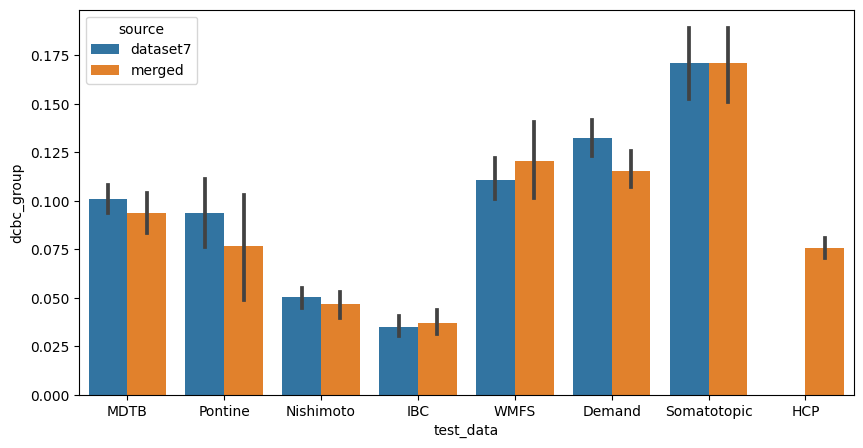

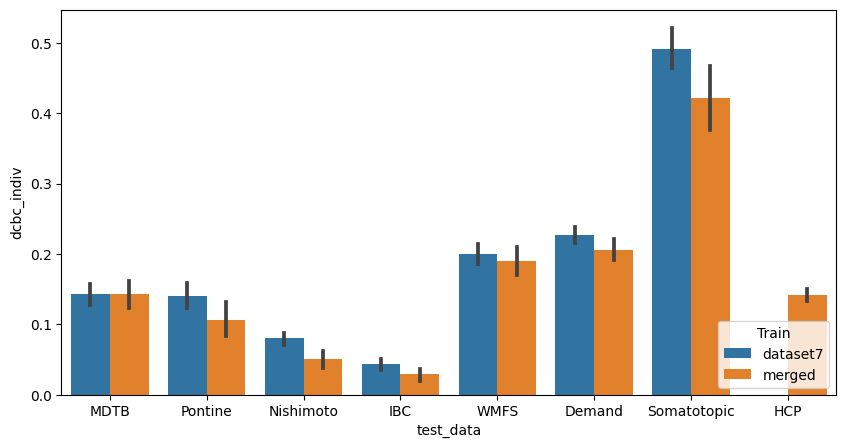

In [41]:
plt.figure(figsize=figsize)
sb.barplot(data=D[(D.train_type == 'all') & ((D.K == 32) | (D.K == 68))], x="test_data",
           y="dcbc_group", hue="source")

plt.figure(figsize=figsize)
sb.barplot(data=D[(D.train_type == 'all') & ((D.K == 32) | (D.K == 68))], x="test_data",
           y="dcbc_indiv", hue="source")
plt.legend(loc='lower right', title='Train')


<Figure size 1000x500 with 0 Axes>

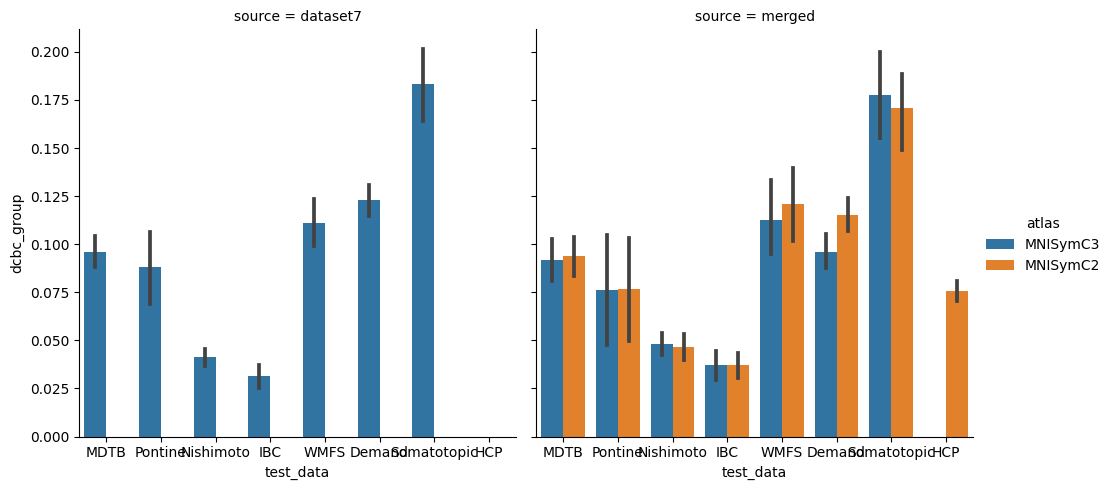

<Figure size 1000x500 with 0 Axes>

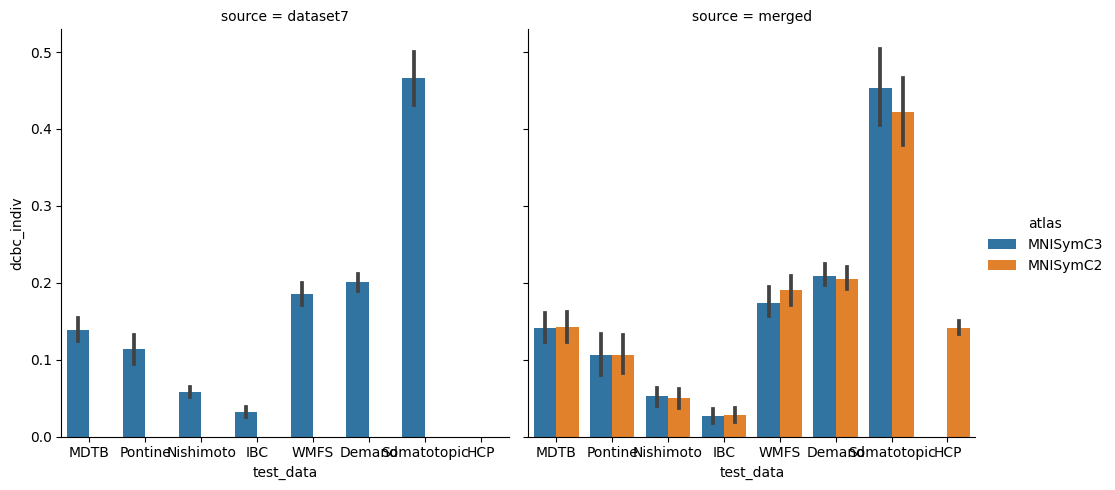

In [50]:
plt.figure(figsize=figsize)
sb.catplot(
    data=D[(D.train_type == 'all') & ((D.K == 32) | (D.K == 34))], x="test_data", y="dcbc_group", col="source", hue="atlas", kind="bar")

plt.figure(figsize=figsize)
sb.catplot(
    data=D[(D.train_type == 'all') & ((D.K == 32) | (D.K == 34))], x="test_data", y="dcbc_indiv", col="source", hue="atlas", kind="bar")
